In [1]:
import pandas as pd
import requests

In [10]:
match_id = input("Enter match id ")
response = requests.get(f'https://sofascore.com/api/v1/event/{match_id}/shotmap')
shots = response.json()
df = pd.json_normalize(shots)

Enter match id11352406


In [3]:
df = pd.json_normalize(shots['shotmap'])

In [4]:
df

,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,id,time,addedTime,timeSeconds,...,draw.start.x,draw.start.y,draw.block.x,draw.block.y,draw.end.x,draw.end.y,draw.goal.x,draw.goal.y,goalType,xgot
0,True,block,assisted,left-foot,low-centre,0.060527,2705995,90,5.0,5652,...,40.9,12.7,42.2,10.7,49.5,0,49.5,81.0,NaN,NaN
1,True,goal,assisted,right-foot,high-left,0.079012,2705977,90,3.0,5561,...,37.9,16.8,NaN,NaN,47.3,0,47.3,68.4,regular,0.2436
2,True,block,regular,right-foot,low-centre,0.242836,2705998,90,2.0,5495,...,52.2,10.2,51.6,7.5,50.0,0,50.0,81.0,NaN,NaN
3,True,save,regular,left-foot,low-centre,0.435375,2705983,90,2.0,5493,...,53.1,7.0,52.3,3.1,51.4,0,51.4,80.4,NaN,0.7073
4,True,block,assisted,left-foot,low-centre,0.079288,2705956,90,1.0,5452,...,53.9,18.9,52.7,13.6,49.7,0,49.7,81.0,NaN,NaN
5,True,goal,assisted,right-foot,low-right,0.133327,2705885,87,NaN,5200,...,37.5,9.8,NaN,NaN,54.2,0,54.2,98.7,regular,0.7160
6,True,miss,assisted,right-foot,close-high-right,0.036465,2705827,84,NaN,5023,...,30.9,13.4,NaN,NaN,58.3,0,58.3,41.7,NaN,NaN
7,False,goal,regular,left-foot,low-right,0.168423,2705792,81,NaN,4841,...,40.7,8.5,NaN,NaN,52.7,0,52.7,98.7,regular,0.7924
8,False,miss,regular,right-foot,close-right,0.077545,2705766,80,NaN,4774,...,64.4,1.8,NaN,NaN,57.0,0,57.0,76.4,NaN,NaN
9,False,save,throw-in-set-piece,left-foot,low-right,0.170569,2705765,80,NaN,4769,...,36.6,3.9,46.9,0.3,52.6,0,52.6,96.8,NaN,0.4400


In [5]:
selected_columns = ['isHome', 'shotType', 'situation', 'bodyPart', 'goalMouthLocation',
                    'xg', 'id', 'time', 'addedTime', 'timeSeconds', 'reversedPeriodTime',
                    'reversedPeriodTimeSeconds', 'incidentType', 'player.name', 'player.position', 
                    'player.jerseyNumber', 'player.id', 'playerCoordinates.x', 'playerCoordinates.y', 
                    'playerCoordinates.z', 'goalMouthCoordinates.x', 'goalMouthCoordinates.y', 
                    'goalMouthCoordinates.z', 'blockCoordinates.x', 'blockCoordinates.y', 'blockCoordinates.z', 
                    'draw.start.x', 'draw.start.y', 'draw.block.x', 'draw.block.y', 'draw.end.x', 'draw.end.y', 
                    'draw.goal.x', 'draw.goal.y', 'goalType', 'xgot']

df_selected = df[selected_columns]

In [6]:
result_df = df_selected

In [7]:
shift_value = 10  
result_df['draw.start.x'] -= shift_value

/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_33742/2128409884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['draw.start.x'] -= shift_value


/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_33742/3810120568.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edge_color'] = '#ea6969'  # Default edge color
/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_33742/3810120568.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['face_color'] = 'none'  # Blank face color
/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_33742/3810120568.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

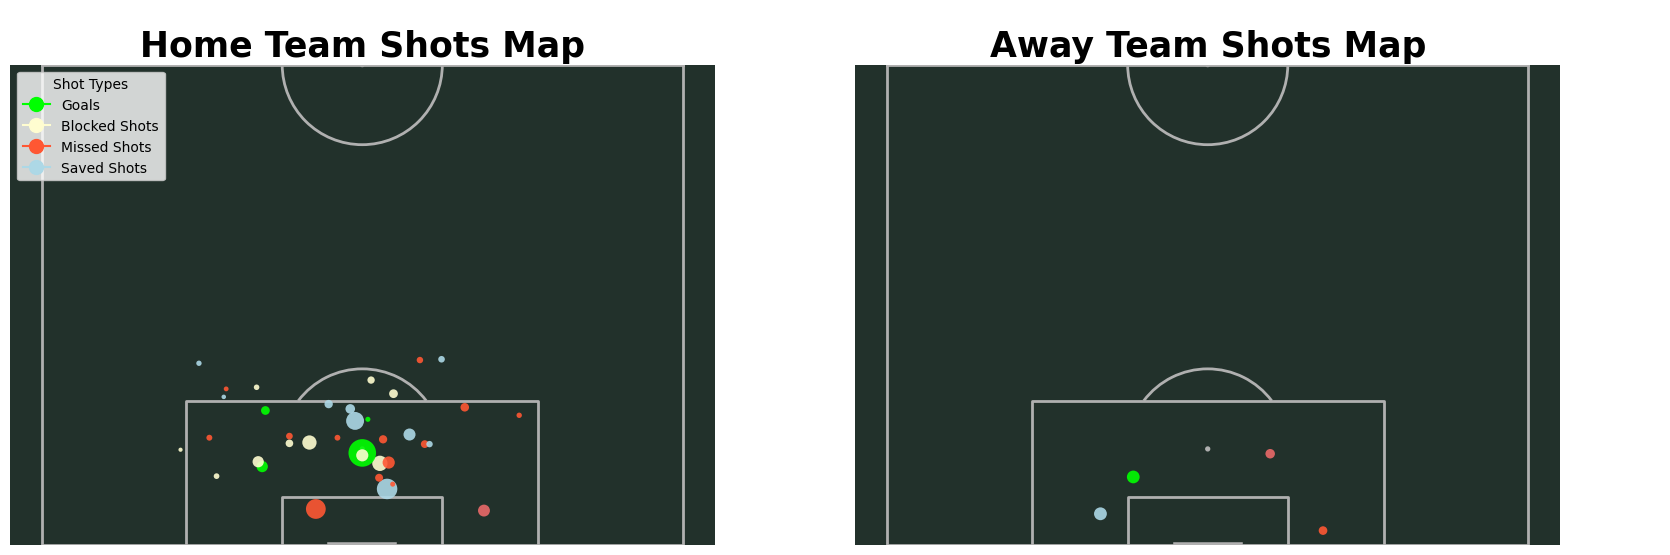

In [15]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mplsoccer.pitch import VerticalPitch

# Filter result_df where 'isHome' column is true
result_df_home = result_df[result_df['isHome']]
# Filter result_df where 'isHome' column is false
result_df_away = result_df[~result_df['isHome']]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6.5))

for ax, df, title in zip(axes, [result_df_home, result_df_away], ['Home', 'Away']):
    # Create a VerticalPitch with half=True need to pad since the coords are for the bottom half.
    pitch = VerticalPitch(half=True, pad_top=-60, pad_bottom=60, pitch_color='#22312b')  # Set background color to #22312b

    # Get the figure and axis objects from the pitch
    pitch.draw(ax=ax)

    df['edge_color'] = '#ea6969'  # Default edge color
    df['face_color'] = 'none'  # Blank face color

    # Change the edge color based on shot type
    df.loc[df['shotType'] == 'goal', 'edge_color'] = '#00FF00'  # Goal
    df.loc[df['shotType'] == 'block', 'edge_color'] = '#fffdd0'  # Block
    df.loc[df['shotType'] == 'miss', 'edge_color'] = '#FF5733'  # Miss
    df.loc[df['shotType'] == 'save', 'edge_color'] = '#ADD8E6'  # Save

    # Draw the scatter plot on the main pitch with solid circles and respective edge colors
    scatter = ax.scatter(df['draw.start.x'], df['draw.start.y'], facecolors=df['edge_color'],
                         edgecolors='none', marker='o', s=df['xg']*500, linewidth=1, alpha=.9, label='Shots Missed')

    # Customize the scatter plot as needed
    ax.set_title(f'{title} Team Shots Map', c='black', fontsize=25, weight='bold')

# Add legend with handles using the same edge color and face color as shots
legend_labels = {'goal': 'Goals', 'block': 'Blocked Shots', 'miss': 'Missed Shots', 'save': 'Saved Shots'}
handles = [
    plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markeredgecolor=color, markersize=10, label=label)
    for color, label in zip(['#00FF00', '#fffdd0', '#FF5733', '#ADD8E6'], legend_labels.values())
]
axes[0].legend(handles=handles, title='Shot Types', loc='upper left')

# Add annotation in the top right corner
plt.annotate('Circle Sizes Represent xG', xy=(0.95, 0.95), xycoords='figure fraction', ha='right', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='white', alpha=0.7), fontsize=14)

plt.show()

Need to find way to improve and map team names to home away later and automate this whole process especially the -10 x value